In [1]:
# from google.colab import drive

# drive.mount("/content/gdrive")

# %cd 'gdrive/MyDrive/01_research/farmer_protests/calc'
# !ls

Mounted at /content/gdrive
/content/gdrive/MyDrive/01_research/farmer_protests/calc
00_descriptive_statistics.ipynb  cost_gpt_sampled_data.txt  plot.gdoc		Untitled0.ipynb
01_gpt_classification.ipynb	 define_categories.ipynb    plotly_map.html
02_results.ipynb		 out.txt		    reosons_sorted.txt


## First descriptive look

In [1]:
import pandas as pd
# df_results = pd.read_csv('../data/content_res_gpt_no_cot_no_con_mini.csv')
df_results = pd.read_csv('../data/content_res_gpt_4o_cot_con.csv')
df_results = df_results.drop(columns=['None of the above'])

df_res = df_results.copy()

In [2]:
import textwrap
df_results.columns = [textwrap.fill(col, width=26) for col in df_results.columns]

In [3]:
df_results

,Rising Production Costs,Opposition to EU Free-\nTrade Agreements,Environmental Regulations\nand Agricultural Standards,Bureaucratic Constraints,Opposition to Foreign\nAgricultural Imports,Subsidy Cuts,Climate and Natural\nDisaster Relief,Labor and Social\nConditions,Solidarity Movements,Opposition to Renewable\nEnergy Projects,Economic Struggles and\nAgricultural Livelihoods,Consumer Awareness\nInitiatives,Livestock and Animal\nWelfare Protests,Opposition to Non-\nTraditional Products,Infrastructure and\nTransport Policies,National and Local State\nSupport,Fair Compensation and\nMarket Practices,Miscellaneous Agriculture-\nRelated Protests
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4637,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4638,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4640,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [4]:
df_reasons_count = pd.DataFrame(df_results.sum(), columns=['occurence'])

df_reasons_count_sorted = df_reasons_count.sort_values(by='occurence', ascending=False).reset_index(names=['reason'])

# df_reasons_count = df_reasons_count[df_reasons_count['reason'] != 'None of the above']
df_reasons_count.occurence

Rising Production Costs                                   962
Opposition to EU Free-\nTrade Agreements                  548
Environmental Regulations\nand Agricultural Standards    1408
Bureaucratic Constraints                                 1030
Opposition to Foreign\nAgricultural Imports              2057
Subsidy Cuts                                             1255
Climate and Natural\nDisaster Relief                      591
Labor and Social\nConditions                              554
Solidarity Movements                                      157
Opposition to Renewable\nEnergy Projects                   27
Economic Struggles and\nAgricultural Livelihoods          603
Consumer Awareness\nInitiatives                            20
Livestock and Animal\nWelfare Protests                     70
Opposition to Non-\nTraditional Products                   46
Infrastructure and\nTransport Policies                     83
National and Local State\nSupport                         895
Fair Com

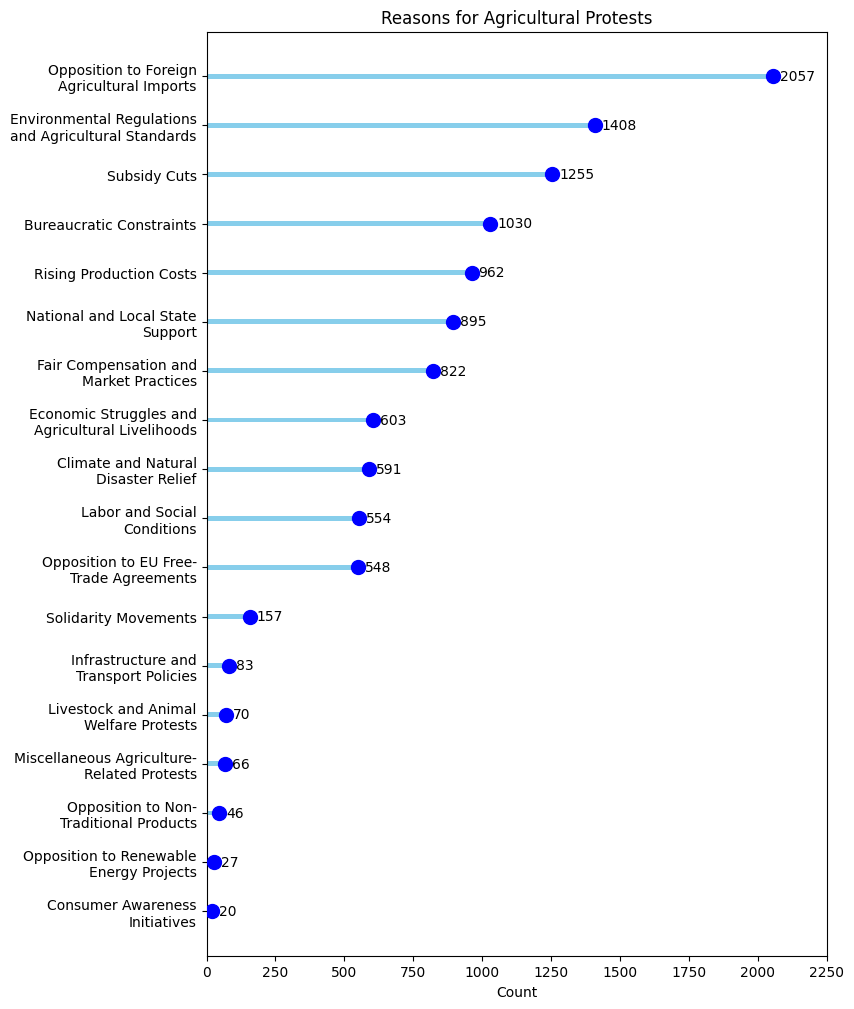

In [5]:
import matplotlib.pyplot as plt
import numpy as np


y_pos = np.arange(len(df_reasons_count_sorted.reason))

# Create horizontal lollipop chart
plt.figure(figsize=(8, 12))
plt.barh(y_pos, df_reasons_count_sorted.occurence, color='skyblue', height=0.1)
# Adding dots (lollipops) at the end of the bars
plt.scatter(df_reasons_count_sorted.occurence, y_pos, color='blue', s=100, zorder=3)  # 's' controls the size of the dots

plt.yticks(y_pos, df_reasons_count_sorted.reason)
plt.xlabel('Count')
plt.title('Reasons for Agricultural Protests')
# Adding lollipops
for i, v in enumerate(df_reasons_count_sorted.occurence):
    plt.text(v + 25, i, str(v), va='center')

plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.xlim(0, 2250)  # Set the y-axis limits to 0 and 100

plt.show()

In [6]:
!pip install adjustText

In [7]:
import textwrap
df_res.columns = [textwrap.fill(col, width=15) for col in df_res.columns]

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


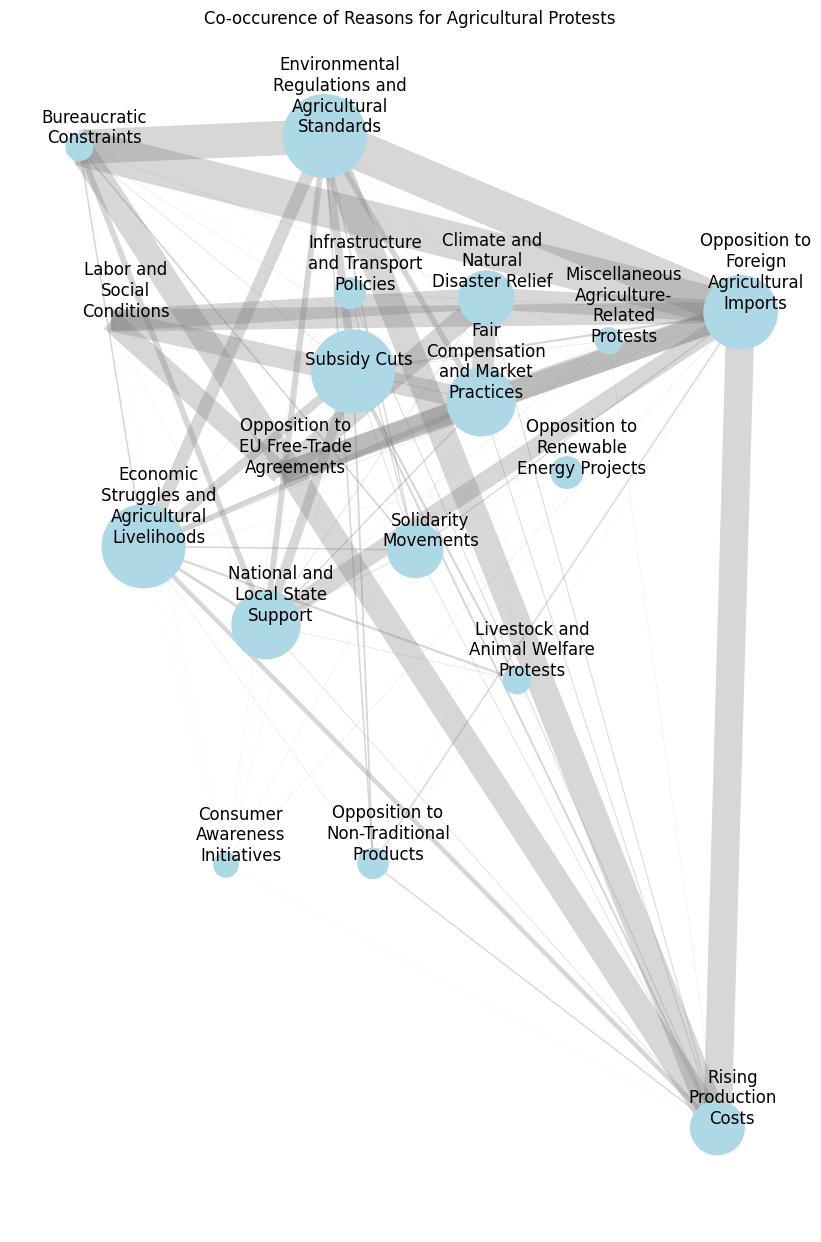

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import textwrap
from adjustText import adjust_text



# Create a co-occurrence matrix
cooccurrence_matrix = df_res.T.dot(df_res)
np.fill_diagonal(cooccurrence_matrix.values, 0)


# Set the figure size before drawing the graph
plt.figure(figsize=(8, 12))  # Adjust width and height as needed

# Create a NetworkX graph from the co-occurrence matrix
graph = nx.from_pandas_adjacency(cooccurrence_matrix)

# Get edge weights (co-occurrence frequencies)
weights = [graph[u][v]['weight'] for u, v in graph.edges()]

# Scale weights for better visualization (adjust as needed)
scaled_weights = [w /35 for w in weights]

node_weights = df_reasons_count.occurence*3
node_weights = [v * 100000 for v in nx.betweenness_centrality(graph).values()]  # Scale for visualization


layout = nx.kamada_kawai_layout(graph)  # Example: spring layout
# layout['Fair\nCompensation\nand Market\nPractices'] = [-0.4, -0.5]  # Set the desired position
# layout['Infrastructure\nand Transport\nPolicies'] = [0.1, -.5]
# layout['Miscellaneous\nAgriculture-\nRelated\nProtests'] = [-0.45,  .65]
# layout['Opposition to\nForeign\nAgricultural\nImports'] = [0.9, 0.3]



# layout = nx.random_layout(graph, seed=5)  # use (either) global default RNG

# Draw the graph
nx.draw(graph, with_labels=False, node_color='#ADD8E6', edge_color='#80808050', node_size=node_weights, width=scaled_weights, pos=layout)


# Get node positions and labels for adjustText
texts = [plt.text(layout[node][0], layout[node][1], node, fontsize=12, ha="center", va="bottom") for node in graph.nodes()]
# Adjust label positions to avoid overlaps
adjust_text(texts, autoalign='xy', only_overlap={'text':'text'}, arrowprops=dict(arrowstyle="-", color='red', lw=0.0), force_points=0.1, force_text=0.8, force_pull=0.9, avoid_self=False, max_move=(5,5), ensure_inside_axes =False, min_arrow_len=15     )

plt.title('Co-occurence of Reasons for Agricultural Protests')


plt.show()

C:\Users\cstetter\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
C:\Users\cstetter\AppData\Local\Temp\ipykernel_19080\3267661780.py:42: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax1.add_patch(plt.Rectangle((i, i), 1, 1, fill=True, color='lightgrey', edgecolor='lightgrey'))
C:\Users\cstetter\AppData\Local\Temp\ipykernel_19080\3267661780.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


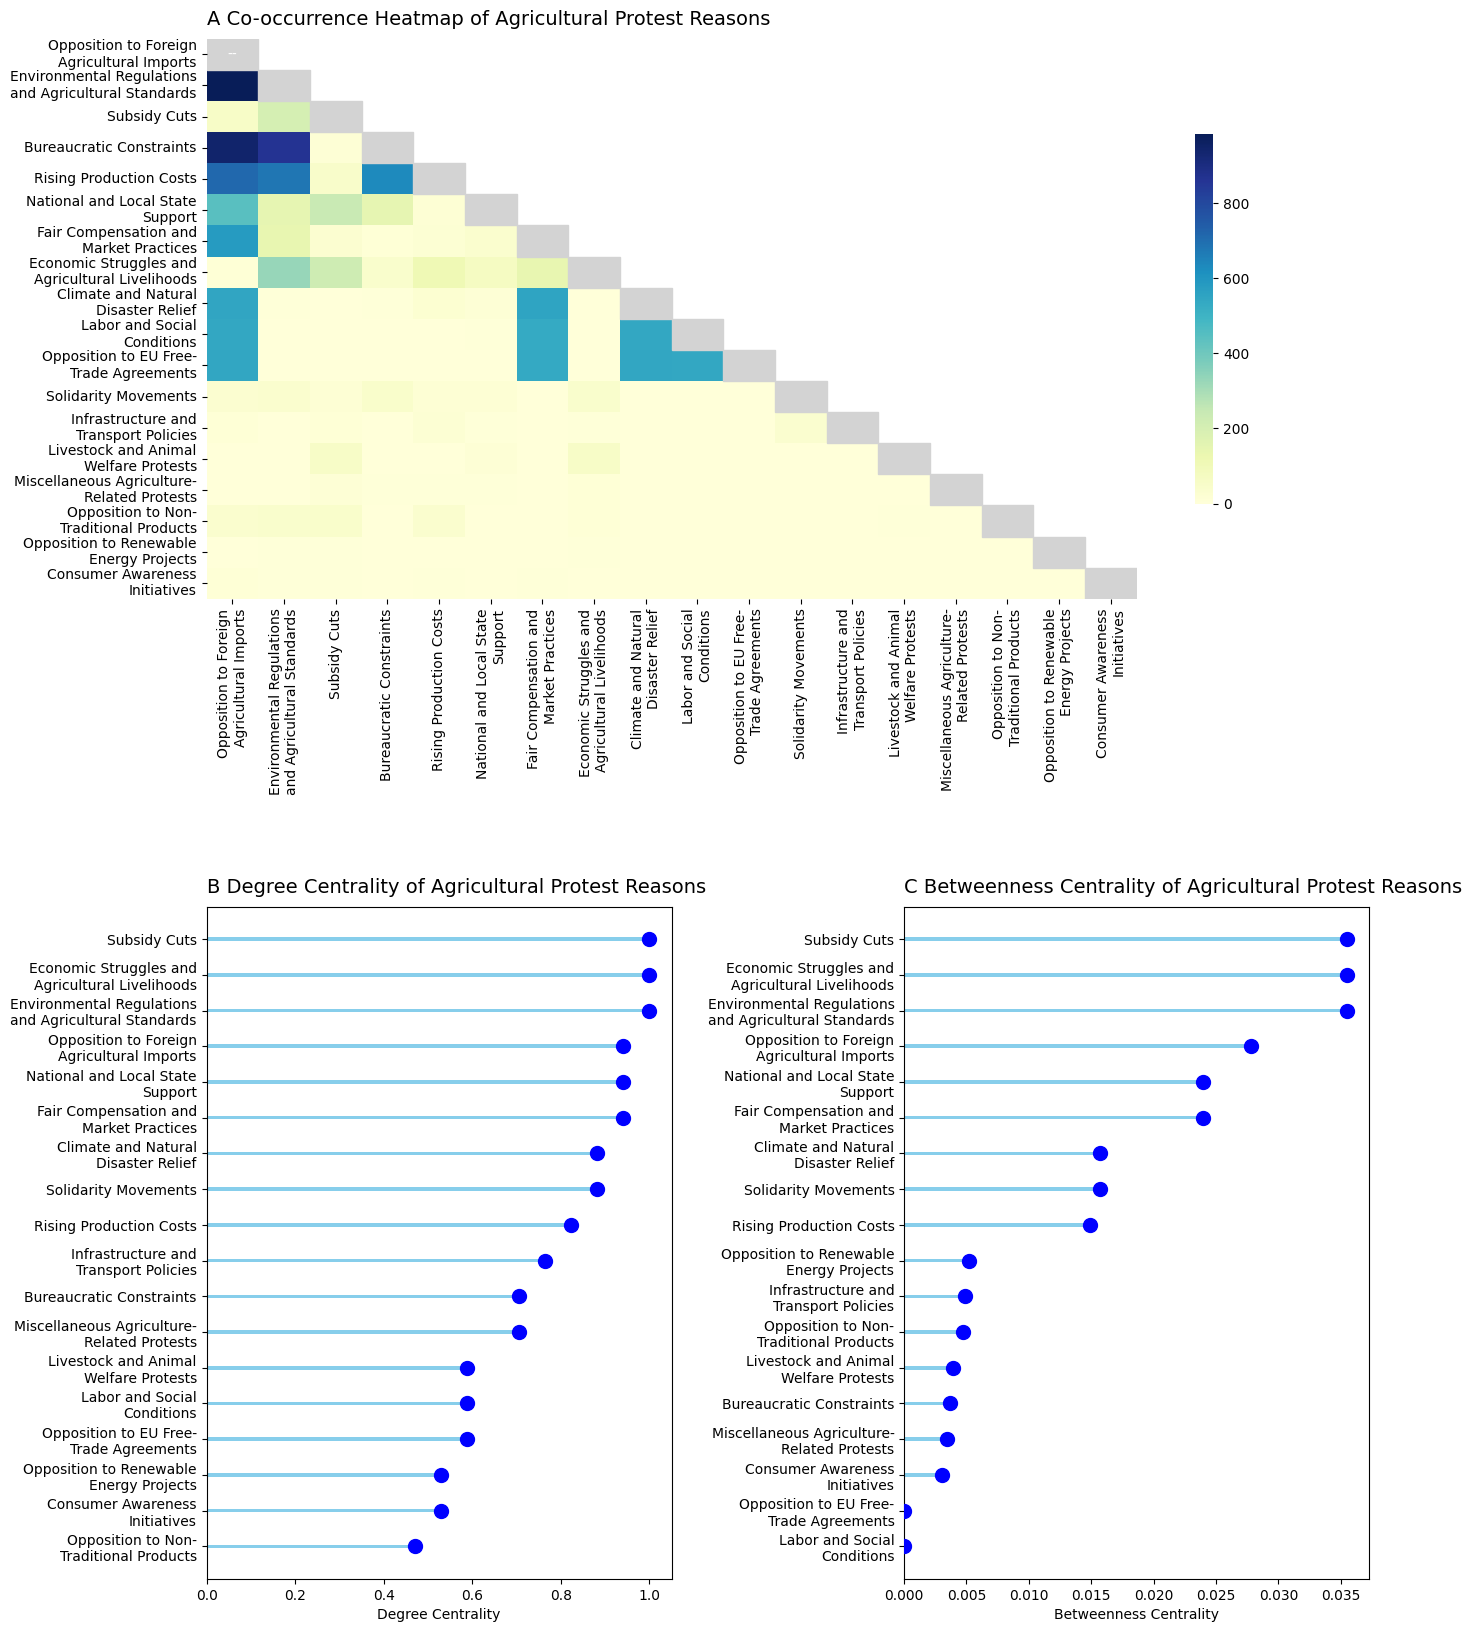

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx

# Get column sums
col_sums = df_results.sum()

# Sort columns by sums in descending order
sorted_cols = col_sums.sort_values(ascending=False).index

# Reorder columns
df_res_sorted = df_results[sorted_cols]


# Create a co-occurrence matrix
cooccurrence_matrix = df_res_sorted.T.dot(df_res_sorted)
np.fill_diagonal(cooccurrence_matrix.values, 0)


# Create a NetworkX graph from the co-occurrence matrix
graph = nx.from_pandas_adjacency(cooccurrence_matrix)


degree_centrality = nx.degree_centrality(graph)
df_degree_centrality = pd.DataFrame(list(degree_centrality.items()), columns=['Reason', 'DegreeCentrality']).sort_values(by='DegreeCentrality', ascending=False)


betweenness_centrality = nx.betweenness_centrality(graph)
df_betweenness_centrality = pd.DataFrame(list(betweenness_centrality.items()), columns=['Reason', 'BetweennessCentrality']).sort_values(by='BetweennessCentrality', ascending=False)

# Create the grid layout
fig = plt.figure(figsize=(15, 20))  # Adjust size as needed
gs = fig.add_gridspec(2, 2, hspace=0.5,wspace=0.5, height_ratios=[1,1.2])

# Plot "aa" - Co-occurrence Heatmap (spanning two columns)
ax1 = fig.add_subplot(gs[0, :])  # Span both columns
mask = np.triu(np.ones_like(cooccurrence_matrix, dtype=bool))
sns.heatmap(cooccurrence_matrix, annot=True, mask=mask, cmap="YlGnBu", fmt="d", ax=ax1, cbar_kws={'shrink': 0.66})
for i in range(len(cooccurrence_matrix)):
    ax1.add_patch(plt.Rectangle((i, i), 1, 1, fill=True, color='lightgrey', edgecolor='lightgrey'))
ax1.set_title("A Co-occurrence Heatmap of Agricultural Protest Reasons", loc='left', pad=10, fontsize=14)

ax1.set_xticklabels(df_res_sorted.columns, rotation=90, ha='right', va='center', rotation_mode='anchor')





# Plot "b" - Degree Centrality Lollipop
ax2 = fig.add_subplot(gs[1, 0])  # First column, second row
y_pos = np.arange(len(df_degree_centrality.Reason))
ax2.barh(y_pos, df_degree_centrality.DegreeCentrality, color='skyblue', height=0.1)
ax2.scatter(df_degree_centrality.DegreeCentrality, y_pos, color='blue', s=100, zorder=3)
ax2.set_yticks(y_pos)
ax2.set_yticklabels(df_degree_centrality.Reason)
ax2.set_xlabel('Degree Centrality')
ax2.set_title('B Degree Centrality of Agricultural Protest Reasons', loc='left', pad=10, fontsize=14)
ax2.invert_yaxis()

# Plot "c" - Betweenness Centrality Lollipop
ax3 = fig.add_subplot(gs[1, 1])  # Second column, second row
y_pos = np.arange(len(df_betweenness_centrality.Reason))
ax3.barh(y_pos, df_betweenness_centrality.BetweennessCentrality, color='skyblue', height=0.1)
ax3.scatter(df_betweenness_centrality.BetweennessCentrality, y_pos, color='blue', s=100, zorder=3)
ax3.set_yticks(y_pos)
ax3.set_yticklabels(df_betweenness_centrality.Reason)
ax3.set_xlabel('Betweenness Centrality')
ax3.set_title('C Betweenness Centrality of Agricultural Protest Reasons', loc='left', pad=10, fontsize=14)
ax3.invert_yaxis()

# Adjust layout
plt.tight_layout()

# plt.savefig('../img/supp_cooccurence.png', dpi=300, bbox_inches='tight')
plt.show()


In [6]:
import geopandas as gpd
from shapely.geometry import Polygon


# Load europe
zipfile = "../data/ne_110m_admin_0_countries.zip"
world = gpd.read_file(zipfile)

europe = world[world.CONTINENT == 'Europe'].iloc[1:,] #Exclude Russia


# Assuming 'world' is your GeoDataFrame containing global countries
cyprus_northern_cyprus_turkey = world[world['ADMIN'].isin(['Cyprus', 'Northern Cyprus', 'Turkey'])]

# Concatenate the selected countries with the 'europe' GeoDataFrame
europe = pd.concat([europe, cyprus_northern_cyprus_turkey], ignore_index=True)


# Make polygon from bbox coordinates https://stackoverflow.com/a/68741143/18253502
def make_bbox(long0, lat0, long1, lat1):
    return Polygon([[long0, lat0],
                    [long1,lat0],
                    [long1,lat1],
                    [long0, lat1]])

# Coords covering Europe & Russia made with http://bboxfinder.com
bbox = make_bbox(-11.386719,35.228890,30.292969,74.543330)

# STEP 2 #
# Convert to gdf
bbox_gdf = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry = [bbox])

# Use bbox as clipping border for Europe
europe = europe.overlay(bbox_gdf, how="intersection")
# europe = world.clip(bbox_gdf)
europe = europe[~europe['ADMIN'].isin(['Greenland', 'Iceland', 'Ukraine', 'Belarus'])]

In [7]:
import pandas as pd
df_main = pd.read_csv('../data/df_main_protests.csv')

df_main['description'] = df_main['description'].astype(str)
# df_main['description'] = df_main['description'].fillna('')
df_main = df_main.reset_index(drop=True)
df_main.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp', 'population_best', 'month', 'description'],
      dtype='object')

In [8]:
# Unwrap by replacing newline characters with spaces
# original_columns = [col.replace('\n', ' ') for col in df_results.columns]

# # # Assign unwrapped names back to columns
# df_results.columns = original_columns


df_results_full = pd.concat([df_main, df_results], axis=1)



gdf = gpd.GeoDataFrame(
    df_results_full, geometry=gpd.points_from_xy(df_results_full.longitude, df_results_full.latitude), crs="EPSG:4326"
)

# Remove points outside bounding box
mask = gdf.geometry.intersects(bbox_gdf.unary_union)  # Create mask
gdf = gdf[mask]  # Filter GeoDataFrame

# Perform a spatial join to keep only points within countries
gdf = gpd.sjoin(gdf, europe, how='inner', predicate='intersects')

# Optionally, drop the index_right column added by sjoin
gdf = gdf.drop(columns=['index_right'])

list(gdf.columns)

C:\Users\cstetter\AppData\Local\Temp\ipykernel_23080\1989318964.py:17: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mask = gdf.geometry.intersects(bbox_gdf.unary_union)  # Create mask


['event_id_cnty',
 'event_date',
 'year',
 'time_precision',
 'disorder_type',
 'event_type',
 'sub_event_type',
 'actor1',
 'assoc_actor_1',
 'inter1',
 'actor2',
 'assoc_actor_2',
 'inter2',
 'interaction',
 'civilian_targeting',
 'iso',
 'region',
 'country',
 'admin1',
 'admin2',
 'admin3',
 'location',
 'latitude',
 'longitude',
 'geo_precision',
 'source',
 'source_scale',
 'notes',
 'fatalities',
 'tags',
 'timestamp',
 'population_best',
 'month',
 'description',
 'Rising Production Costs',
 'Opposition to EU Free-\nTrade Agreements',
 'Environmental Regulations\nand Agricultural Standards',
 'Bureaucratic Constraints',
 'Opposition to Foreign\nAgricultural Imports',
 'Subsidy Cuts',
 'Climate and Natural\nDisaster Relief',
 'Labor and Social\nConditions',
 'Solidarity Movements',
 'Opposition to Renewable\nEnergy Projects',
 'Economic Struggles and\nAgricultural Livelihoods',
 'Consumer Awareness\nInitiatives',
 'Livestock and Animal\nWelfare Protests',
 'Opposition to Non-\nT

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import geopandas as gpd
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.lines import Line2D


sorted_cols_map = gdf.loc[:,'Rising Production Costs':'Miscellaneous Agriculture-\nRelated Protests'].sum().sort_values(ascending=False).index


# Set up figure
fig = plt.figure(constrained_layout=True, dpi=300, figsize=(10, 14))

# Create a 4x4 grid
spec = gridspec.GridSpec(ncols=4, nrows=4, figure=fig)

# Subplots grid as follows:
# 1  2  3  4
# 5  0  0  6
# 7  0  0  8
# 9 10 11 12

# Defining subplots for the numbered cells
subplot_positions = {
    1: fig.add_subplot(spec[0, 0]),  # First row
    2: fig.add_subplot(spec[0, 1]),
    3: fig.add_subplot(spec[0, 2]),
    4: fig.add_subplot(spec[0, 3]),
    5: fig.add_subplot(spec[1, 0]),  # Second row
    6: fig.add_subplot(spec[1, 3]),
    7: fig.add_subplot(spec[2, 0]),  # Third row
    8: fig.add_subplot(spec[2, 3]),
    9: fig.add_subplot(spec[3, 0]),  # Fourth row
    10: fig.add_subplot(spec[3, 1]),
    11: fig.add_subplot(spec[3, 2]),
    12: fig.add_subplot(spec[3, 3]),
}

# Create the large subplot (for "0" cells) spanning the center
central_subplot = fig.add_subplot(spec[1:3, 1:3])  # Spans rows 1-2, cols 1-2

# Example of data plotting for individual subplots
# Assuming `europe` is a GeoDataFrame of the map of Europe
# And `gdf` is a GeoDataFrame with binary columns you want to plot

# Flatten subplots into a list for easy iteration
axs = list(subplot_positions.values())

# Plot each column in a separate subplot
for i, column in enumerate(gdf.loc[:,sorted_cols_map].columns[:12]):  # Adjust column selection to match data
    europe.plot(ax=axs[i], color='gray', edgecolor='black', alpha=0.15)
    gdf[gdf[column] == 1].plot(ax=axs[i], color='red', markersize=0.25, column=column, legend=False)

    # Set the title to the column name and disable axis elements
    axs[i].set_title(f"{column}")
    axs[i].set_axis_off()


# Plot the map with all instances as a point in the central subplot
europe.plot(ax=central_subplot, color='gray', edgecolor='black', alpha=0.15)
gdf.plot(ax=central_subplot, color='blue', markersize=1, legend=False)  # Plot all instances as points

# Customize the central subplot (optional)
central_subplot.set_title("All Instances")
central_subplot.set_axis_off()


# Adding a rectangle around the entire subplot area (excluding the title)
rect = patches.FancyBboxPatch(
    (1/3, 0.36), 1/3, 0.28,
    transform=fig.transFigure,
    color='black',
    linewidth=2,
    fill=False,
    boxstyle="round,pad=0.1"
)



# Draw line with a bend from the center subplot to an outer subplot (e.g., subplot 1)
# Calculate positions based on subplot layout
center_x = 0.5  # X position of the center subplot
center_y = 0.5  # Y position of the center subplot

# Outer subplot (e.g., position 1)
outer_sub_x = 0.125  # Adjust based on the subplot's location
outer_sub_y = 0.85   # Adjust based on the subplot's location

# Create a line with a bend
bend_x = (center_x + outer_sub_x) / 2  # Bend at midpoint in x
bend_y = center_y + (outer_sub_y - center_y) / 3  # Bend upward

# Create a Line2D object for the line
line = Line2D([center_x, bend_x, outer_sub_x], [center_y, bend_y, outer_sub_y], color='black', linewidth=2)

# Add the line to the central subplot
fig.add_artist(line)


# Adding the rectangle to the figure
fig.patches.append(rect)

# Show the plot
plt.show()


NameError: name 'gdf' is not defined

# Make big plot

In [10]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import networkx as nx
from adjustText import adjust_text
import matplotlib.cm as cm

# Create a figure
fig = plt.figure(figsize=(16, 21))
plt.tight_layout()  # Adjust layout to prevent overlap
spec = gridspec.GridSpec(5, 6, height_ratios=[1,1,1,1,1.1])  # Create a grid of 5 rows and 4 columns



fig.text(0.0, 0.9, 'A) Total Occurrences of\n     Protest Reasons', fontsize=20, weight='bold', ha='left')
fig.text(0.39, 0.9, 'B) Spatial Distribution of Protests and Reasons\n', fontsize=20, weight='bold', ha='left')


fig.text(0.0, 0.55, 'C) Protest Reason Co-Occurrence', fontsize=20, weight='bold', ha='left')
fig.text(0.0, 0.23, 'D) Weekly Protest Reason Evolution', fontsize=20, weight='bold', ha='left')


# fig.text(0.5, .96, 'B) Analysis of R² Decomposition by Instruments', fontsize=20, weight='bold', ha='left')
# fig.text(0.02, 0.58, 'C) Analysis of R² Decomposition by Topics', fontsize=20, weight='bold', ha='left')




####### Top left driver occurence #######3

top_left = fig.add_subplot(spec[0:2, 0:2], sharex=None, sharey=None)  # Spans rows 1-2, cols 1-2
top_left.set_position([0.12, 0.59, 0.24, 0.31])

# Data for lollipop chart
y_pos = np.arange(len(df_reasons_count_sorted['occurence']))

# Horizontal lollipop chart
top_left.barh(y_pos, df_reasons_count_sorted['occurence'], color='skyblue', height=0.1)
top_left.scatter(df_reasons_count_sorted['occurence'], y_pos, color='blue', s=100, zorder=3)
top_left.set_yticks(y_pos)
top_left.set_yticklabels(df_reasons_count_sorted.reason, fontweight="bold", fontsize=10)
top_left.set_xlabel('Count')
# top_left.set_title('Reasons for Agricultural Protests')

# Adding lollipops
for i, v in enumerate(df_reasons_count_sorted['occurence']):
    top_left.text(v + 50, i, str(v), va='center')

top_left.invert_yaxis()
top_left.set_xlim(0, 2250)


# Remove unnecessary spines
top_left.spines['top'].set_visible(False)    # Hide the top spine
top_left.spines['right'].set_visible(False)  # Hide the right spine
top_left.spines['left'].set_visible(False)   # Hide the left spine
top_left.spines['bottom'].set_linewidth(1)   # Set the x-axis line width


top_left.tick_params(left=False, bottom=True, labelleft=True, labelbottom=True)



####### Left center co-occurrence #######
cooccurence_left = fig.add_subplot(spec[2:4, 0:2], sharex=None, sharey=None)
cooccurence_left.set_position([0.0, 0.25, 0.35, 0.3])

# Create a co-occurrence matrix
cooccurrence_matrix = df_res.T.dot(df_res)
np.fill_diagonal(cooccurrence_matrix.values, 0)

# Create a NetworkX graph from the co-occurrence matrix
graph = nx.from_pandas_adjacency(cooccurrence_matrix)

# Get edge weights (co-occurrence frequencies)
weights = [graph[u][v]['weight'] for u, v in graph.edges()]

# Scale weights for better visualization (adjust as needed)
scaled_weights = [w /50 for w in weights]

# node_weights = df_reasons_count.occurence*3
node_weights = [v * 50000 for v in nx.betweenness_centrality(graph).values()]  # Scale for visualization

# Define custom layout for graph nodes
layout = nx.arf_layout(graph)
# layout['Climate and\nNatural\nDisaster Relief']= [0.9, -0.0]   # Manually set position for node 1

# Draw the graph within the subplot
nx.draw(graph, ax=cooccurence_left, with_labels=False, node_color='#ADD8E6', edge_color='#80808050',
        node_size=node_weights, width=scaled_weights, pos=layout)

# Add labels and adjust positions to avoid overlap
texts = [cooccurence_left.text(layout[node][0], layout[node][1], node, fontsize=11, ha="center", va="bottom")
         for node in graph.nodes()]

# Adjust label positions to avoid overlap without aligning them to axes
adjust_text(texts, autoalign='xy', only_overlap={'text': 'text'},
            arrowprops=dict(arrowstyle="-", color='red', lw=0.0),
            force_points=0.1, force_text=0.8, force_pull=0.9,
            avoid_self=False, max_move=(5, 5), min_arrow_len=15)


# Set title for the subplot
# cooccurence_left.set_title('Co-occurrence of Reasons for Agricultural Protests')





####### Right maps #######



# Defining subplots for the numbered cells
map_positions = {
    1: fig.add_subplot(spec[0, 2]),  # First row
    2: fig.add_subplot(spec[0, 3]),
    3: fig.add_subplot(spec[0, 4]),
    4: fig.add_subplot(spec[0, 5]),
    9: fig.add_subplot(spec[1, 2]),  # Second row
    10: fig.add_subplot(spec[1, 5]),
    11: fig.add_subplot(spec[2, 2]),  # Fourth row
    12: fig.add_subplot(spec[2, 5]),
    13: fig.add_subplot(spec[3, 2]),  # Fifth row
    14: fig.add_subplot(spec[3, 3]),
    15: fig.add_subplot(spec[3, 4]),
    16: fig.add_subplot(spec[3, 5])
}

# Create the large subplot (for "0" cells) spanning the center
central_subplot_map = fig.add_subplot(spec[1:3, 3:5])  # Spans rows 1-2, cols 1-2





gdf_cols_in_df_results = gdf.loc[:,sorted_cols_map].columns.tolist()

# Example of data plotting for individual subplots
# Assuming `europe` is a GeoDataFrame of the map of Europe
# And `gdf` is a GeoDataFrame with binary columns you want to plot

# Flatten subplots into a list for easy iteration
axs = list(map_positions.values())

# Plot each column in a separate subplot
for i, column in enumerate(gdf.loc[:,sorted_cols_map].columns[:12]):  # Adjust column selection to match data
    europe.plot(ax=axs[i], color='gray', edgecolor='black', alpha=0.15)
    gdf[gdf[column] == 1].plot(ax=axs[i], color='red', markersize=0.25, column=column, legend=False)

    # Set the title to the column name and disable axis elements
    axs[i].set_title(f"{column}")
    axs[i].set_axis_off()


# Plot the map with all instances as a point in the central subplot
europe.plot(ax=central_subplot_map, color='gray', edgecolor='black', alpha=0.15)
gdf.plot(ax=central_subplot_map, color='blue', markersize=1, legend=False)  # Plot all instances as points

# Customize the central subplot (optional)
central_subplot_map.set_title("All Protests")
central_subplot_map.set_axis_off()








####### bottom maps #######
bottom = fig.add_subplot(spec[4:, 0:])
bottom.set_position([0.0, 0., 0.95, 0.25])


# Select columns
selected_columns = ["event_date"] + df_results_full.loc[:, sorted_cols_map].columns.tolist()
df_results_selected = df_results_full[selected_columns]
df_results_selected['event_date'] = pd.to_datetime(df_results_selected['event_date'])

grouped_data = df_results_selected.groupby([pd.Grouper(key='event_date', freq='W')]).sum()

grouped_data.reset_index().to_csv('../data/df_strucchange.csv', index=False)

# Make sure the colors list has enough colors for all columns
colors = plt.cm.get_cmap('tab20').colors[:len(grouped_data.columns)]

# Example dictionary that maps each label (column name) to a color
label_color_map = {
    column: color for column, color in zip(grouped_data.columns, colors)
}



# Create the stacked area chart
stacked_areas = bottom.stackplot(grouped_data.index, *[grouped_data[col] for col in grouped_data.columns[0:]], baseline="sym", colors=colors)


# Customize the bottom subplot
bottom.set_xlabel('Date', fontsize=12)

# Hide y-axis labels and ticks
bottom.set_yticklabels([])  # Remove y tick labels
bottom.set_yticks([])  # Remove y ticks

# Remove unnecessary spines
bottom.spines['top'].set_visible(False)    # Hide the top spine
bottom.spines['right'].set_visible(False)  # Hide the right spine
bottom.spines['left'].set_visible(False)   # Hide the left spine
bottom.spines['bottom'].set_linewidth(1)   # Set the x-axis line width

bottom.tick_params(axis='x', labelsize=11)

# Create the legend for the first half of the columns
first_half_cols = grouped_data.columns[:10]
handles1 = [plt.Line2D([0], [0], color=label_color_map[label], lw=10) for label in first_half_cols]

legend1 = bottom.legend(handles1, first_half_cols, loc='lower left', ncol=3, bbox_to_anchor=(0.0, 0.55), frameon=False, labelspacing=1.2, fontsize=11)

# Create the legend for the second half of the columns
second_half_cols = grouped_data.columns[10:]
handles2 = [plt.Line2D([0], [0], color=label_color_map[label], lw=10) for label in second_half_cols]

legend2 = bottom.legend(handles2, second_half_cols, loc='lower left', ncol=3, bbox_to_anchor=(0.0, 0.05), frameon=False, labelspacing=1.2, fontsize=11)

# Add the first legend back to the plot
bottom.add_artist(legend1)

# # Adding a rectangle around the entire subplot area (excluding the title)
# rect = patches.FancyBboxPatch(
#     (0.61, 0.54), 0.08, 0.1,
#     transform=fig.transFigure,
#     color='black',
#     linewidth=1,
#     fill=False,
#     boxstyle="round,pad=0.1"
# )



# # Adding the rectangle to the figure
# fig.patches.append(rect)


# Show the figure (Optional)
# plt.savefig('../img/main_results.png', dpi=600, bbox_inches='tight')

plt.show()

ModuleNotFoundError: No module named 'adjustText'

C:\Users\cstetter\AppData\Local\Temp\ipykernel_19080\1460928201.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', 18).colors


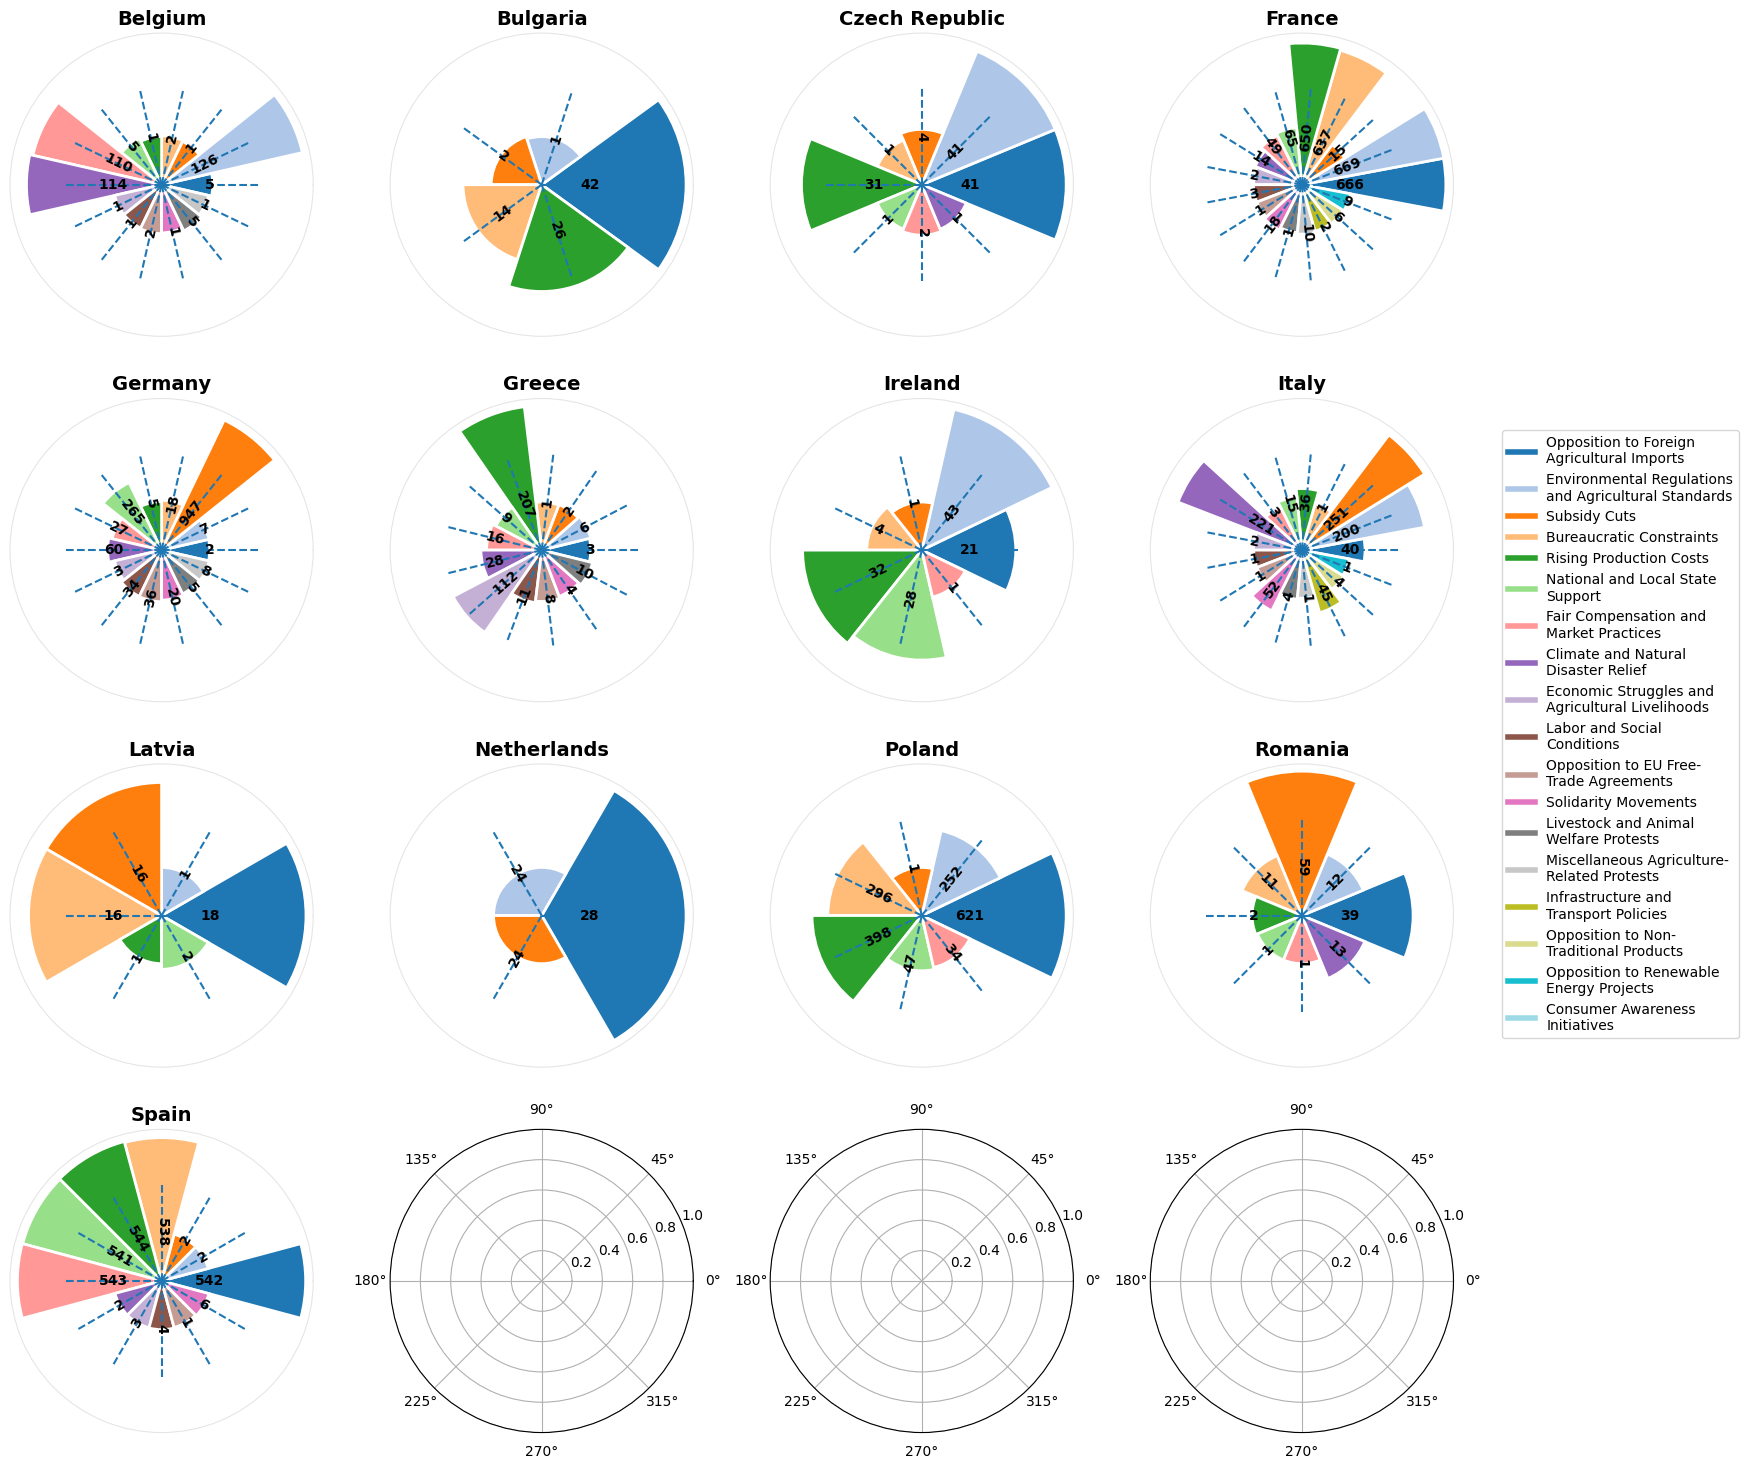

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
colors = cm.get_cmap('tab20', 18).colors

selected_columns = ["country"] + df_results_full.loc[:, sorted_cols_map].columns.tolist()
df_results_selected = df_results_full[selected_columns]
grouped_data = df_results_selected.groupby(["country"]).sum()
filtered_data = grouped_data[grouped_data.sum(axis=1) > 50].T

countries = filtered_data.columns.tolist()
categories = filtered_data.index.tolist()

# Prepare a figure and grid spec for subplots
fig = plt.figure(figsize=(15, 15))
spec = gridspec.GridSpec(nrows=4, ncols=4)  # 4x4 grid

# Create subplots
axs = [
    fig.add_subplot(spec[i, j], polar=True)
    for i in range(4)
    for j in range(4)
]

# Loop through each country in filtered data to create a polar plot
for i, target in enumerate(countries):
    data = filtered_data[target]  # Get data for the current country

    # Filter out zero values
    non_zero_data = data[data > 0]

    # Compute max and min in the non-zero dataset
    max_value = non_zero_data.max()
    min_value = non_zero_data.min()

    # Set coordinates limits
    upperLimit = 120
    lowerLimit = 40

    # Compute the heights based on the non-zero data
    slope = (upperLimit - lowerLimit) / (max_value - min_value)
    heights = slope * (non_zero_data - min_value) + lowerLimit

    # Compute the width of each bar
    width = 2 * np.pi / len(non_zero_data)

    # Compute the angle each bar is centered on
    indexes = list(range(len(non_zero_data)))
    angles = [element * width for element in indexes]

    # Use the corresponding subplot for each country
    ax = axs[i]

    # Plot bars
    bars = ax.bar(
        x=angles,
        height=heights,
        width=width,
        bottom=lowerLimit,
        linewidth=2,
        edgecolor="white",
        # color="#61a4b2",
        color=[colors[idx % len(colors)] for idx in indexes],  # Cycle through the colormap
        zorder=1
    )

    # Padding for the labels
    labelPadding = 4

    # Set the labels and customize ticks
    # ax.set_xticks(angles)
    # ax.set_xticklabels(non_zero_data.index.tolist(), size=12)
    # ax.tick_params(axis='x', which='both', pad=20)
     # Remove labels from x-ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Add labels and percentage annotations for non-zero values
    for bar, angle, height, label, value in zip(bars, angles, heights, non_zero_data.index, non_zero_data.values):
        rotation = np.rad2deg(angle)
        alignment = "right" if np.pi / 2 <= angle < 3 * np.pi / 2 else "left"
        if alignment == "right":
            rotation += 180

        # Only add annotations if the value is not zero
        ax.text(
            x=angle,
            y=lowerLimit + 40,  # Align in the middle of the bar
            s=f'{value:.0f}',  # Format value as percentage
            ha='center',
            va='center',
            color='black',
            fontsize=10,
            rotation=rotation,
            rotation_mode="anchor",
            weight="bold"
        )

    # Add dashed lines for clarity
    ax.vlines(angles, lowerLimit, upperLimit, ls='dashed', zorder=1)

    # Customize the plot
    ax.set_facecolor("white")
    ax.grid(None)
    ax.spines['polar'].set_color((0, 0, 0, 0.1))  # Set color with RGBA where alpha is 0.1 for transparency
    ax.set_yticklabels([])

    # Add a title for each subplot
    ax.set_title(f"{target}", fontsize=14, weight='bold')

# Create a legend below the subplots
legend_labels = categories  # Labels for the legend
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]  # Create handles for the legend
plt.figlegend(handles, legend_labels, loc='center left', ncol=1, bbox_to_anchor=(1, 0.5))

# Final layout adjustments and show plot
plt.tight_layout()

plt.show()


## Spatial statistics test

In [24]:
europe

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,3,Norway,NOR,0,2,Sovereign country,None,Norway,...,None,None,None,None,None,None,None,None,None,"POLYGON ((29.39955 69.15692, 28.59193 69.06478..."
1,Admin-0 country,1,2,France,FR1,1,2,Country,1,France,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((6.65823 49.20196, 8.09928 49.0..."
2,Admin-0 country,1,3,Sweden,SWE,0,2,Sovereign country,1,Sweden,...,None,None,None,None,None,None,None,None,None,"POLYGON ((11.46827 59.43239, 12.30037 60.11793..."
5,Admin-0 country,1,3,Poland,POL,0,2,Sovereign country,1,Poland,...,None,None,None,None,None,None,None,None,None,"POLYGON ((23.52754 53.47012, 23.80493 53.08973..."
6,Admin-0 country,1,4,Austria,AUT,0,2,Sovereign country,1,Austria,...,None,None,None,None,None,None,None,None,None,"POLYGON ((16.90375 47.71487, 16.34058 47.7129,..."
7,Admin-0 country,1,5,Hungary,HUN,0,2,Sovereign country,1,Hungary,...,None,None,None,None,None,None,None,None,None,"POLYGON ((22.64082 48.15024, 22.71053 47.88219..."
8,Admin-0 country,1,6,Moldova,MDA,0,2,Sovereign country,1,Moldova,...,None,None,None,None,None,None,None,None,None,"POLYGON ((26.85782 48.36821, 27.52254 48.46712..."
9,Admin-0 country,1,3,Romania,ROU,0,2,Sovereign country,1,Romania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((28.67978 45.30403, 29.14972 45.46493..."
10,Admin-0 country,1,5,Lithuania,LTU,0,2,Sovereign country,1,Lithuania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((26.58828 55.16718, 25.76843 54.84696..."
11,Admin-0 country,1,5,Latvia,LVA,0,2,Sovereign country,1,Latvia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((27.77002 57.24426, 27.85528 56.75933..."


In [26]:
sorted_cols_map = gdf.loc[:,'Rising Production Costs':'Miscellaneous Agriculture-\nRelated Protests'].sum().sort_values(ascending=False).index

selected_columns = ["country"] + df_results_full.loc[:, sorted_cols_map].columns.tolist()
df_results_selected = df_results_full[selected_columns]
grouped_data = df_results_selected.groupby(["country"]).sum()

grouped_data1 = grouped_data.copy()
grouped_data1['All\nProtests'] = df_results_full['country'].value_counts()

# 4. Merge counts with Europe geodata
grouped_data1 = europe.merge(grouped_data1, left_on="SOVEREIGNT", right_on="country", how="left")

# 5. Fill missing countries with 0
grouped_data1 = grouped_data1.fillna(0)

list(grouped_data1.columns)

C:\Users\cstetter\AppData\Local\Temp\ipykernel_23080\2896097416.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  grouped_data1 = grouped_data1.fillna(0)


['featurecla',
 'scalerank',
 'LABELRANK',
 'SOVEREIGNT',
 'SOV_A3',
 'ADM0_DIF',
 'LEVEL',
 'TYPE',
 'TLC',
 'ADMIN',
 'ADM0_A3',
 'GEOU_DIF',
 'GEOUNIT',
 'GU_A3',
 'SU_DIF',
 'SUBUNIT',
 'SU_A3',
 'BRK_DIFF',
 'NAME',
 'NAME_LONG',
 'BRK_A3',
 'BRK_NAME',
 'BRK_GROUP',
 'ABBREV',
 'POSTAL',
 'FORMAL_EN',
 'FORMAL_FR',
 'NAME_CIAWF',
 'NOTE_ADM0',
 'NOTE_BRK',
 'NAME_SORT',
 'NAME_ALT',
 'MAPCOLOR7',
 'MAPCOLOR8',
 'MAPCOLOR9',
 'MAPCOLOR13',
 'POP_EST',
 'POP_RANK',
 'POP_YEAR',
 'GDP_MD',
 'GDP_YEAR',
 'ECONOMY',
 'INCOME_GRP',
 'FIPS_10',
 'ISO_A2',
 'ISO_A2_EH',
 'ISO_A3',
 'ISO_A3_EH',
 'ISO_N3',
 'ISO_N3_EH',
 'UN_A3',
 'WB_A2',
 'WB_A3',
 'WOE_ID',
 'WOE_ID_EH',
 'WOE_NOTE',
 'ADM0_ISO',
 'ADM0_DIFF',
 'ADM0_TLC',
 'ADM0_A3_US',
 'ADM0_A3_FR',
 'ADM0_A3_RU',
 'ADM0_A3_ES',
 'ADM0_A3_CN',
 'ADM0_A3_TW',
 'ADM0_A3_IN',
 'ADM0_A3_NP',
 'ADM0_A3_PK',
 'ADM0_A3_DE',
 'ADM0_A3_GB',
 'ADM0_A3_BR',
 'ADM0_A3_IL',
 'ADM0_A3_PS',
 'ADM0_A3_SA',
 'ADM0_A3_EG',
 'ADM0_A3_MA',
 'ADM0_A3_PT

In [32]:
from libpysal.weights import KNN, Queen, Rook

w_queen = KNN.from_dataframe(grouped_data1, k=3)

from esda.moran import Moran

moran = Moran(grouped_data1["All\nProtests"], w_queen)
moran.I
moran.p_sim

np.float64(0.49)

In [21]:
gdf.loc[:,['event_date','latitude', 'longitude']]

,event_date,latitude,longitude
0,2024-03-31,39.5054,22.6408
1,2024-03-30,50.7764,6.0857
2,2024-03-29,44.7284,5.0237
3,2024-03-29,47.3220,5.0415
4,2024-03-28,51.1834,2.8218
...,...,...,...
4637,2023-11-07,43.6464,0.5867
4638,2023-11-07,39.6369,22.4176
4639,2023-11-04,43.2132,2.3518
4640,2023-11-03,43.2132,2.3518


In [110]:
# s-coords: spatial coordinates (keep original order)
s_coords = np.array(list(zip(gdf["latitude"], gdf["longitude"])))

# t-coords: number of days since the first event
dates = pd.to_datetime(gdf["event_date"])
t_coords = (dates - dates.min()).dt.days.values  # keeps original order
t_coords

array([151, 150, 149, ...,   3,   2,   0], shape=(4369,))

In [88]:
import numpy as np
import libpysal as lps
from pointpats import SpaceTimeEvents, knox

path = lps.examples.get_path("burkitt.shp")
events = SpaceTimeEvents(path,'T')

In [136]:
from libpysal import cg
permutations=10000

kd_s = cg.KDTree(s_coords)
neigh_s = kd_s.query_pairs(5)
tau2 = 30 * 30
ids = np.array(list(neigh_s))
d_t = (t_coords[ids[:, 0]] - t_coords[ids[:, 1]]) ** 2
n_st = sum(d_t <= tau2)

knox_result = {"stat": n_st}

if permutations:
    joint = np.zeros((permutations, 1), int)
    for p in range(permutations):
        np.random.shuffle(t_coords)
        d_t = (t_coords[ids[:, 0]] - t_coords[ids[:, 1]]) ** 2
        joint[p] = np.sum(d_t <= tau2)

    larger = sum(joint >= n_st)
    if (permutations - larger) < larger:
        larger = permutations - larger
    p_sim = (larger + 1.0) / (permutations + 1.0)
    knox_result["pvalue"] = p_sim

In [137]:
p_sim

array([0.06689331])

C:\Users\cstetter\AppData\Roaming\Python\Python312\site-packages\libpysal\weights\weights.py:1484: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid
C:\Users\cstetter\AppData\Roaming\Python\Python312\site-packages\libpysal\weights\weights.py:1484: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid
C:\Users\cstetter\AppData\Roaming\Python\Python312\site-packages\libpysal\weights\weights.py:1484: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid
C:\Users\cstetter\AppD

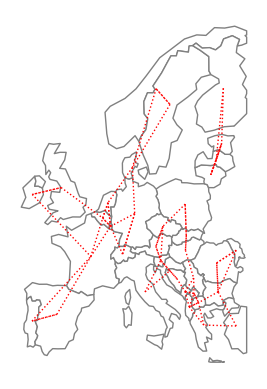

In [22]:
ax = grouped_data1.plot(edgecolor="grey", facecolor="w")
f, ax = w_queen.plot(
    grouped_data1,
    ax=ax,
    edge_kws=dict(color="r", linestyle=":", linewidth=1),
    node_kws=dict(marker=""),
)
ax.set_axis_off()

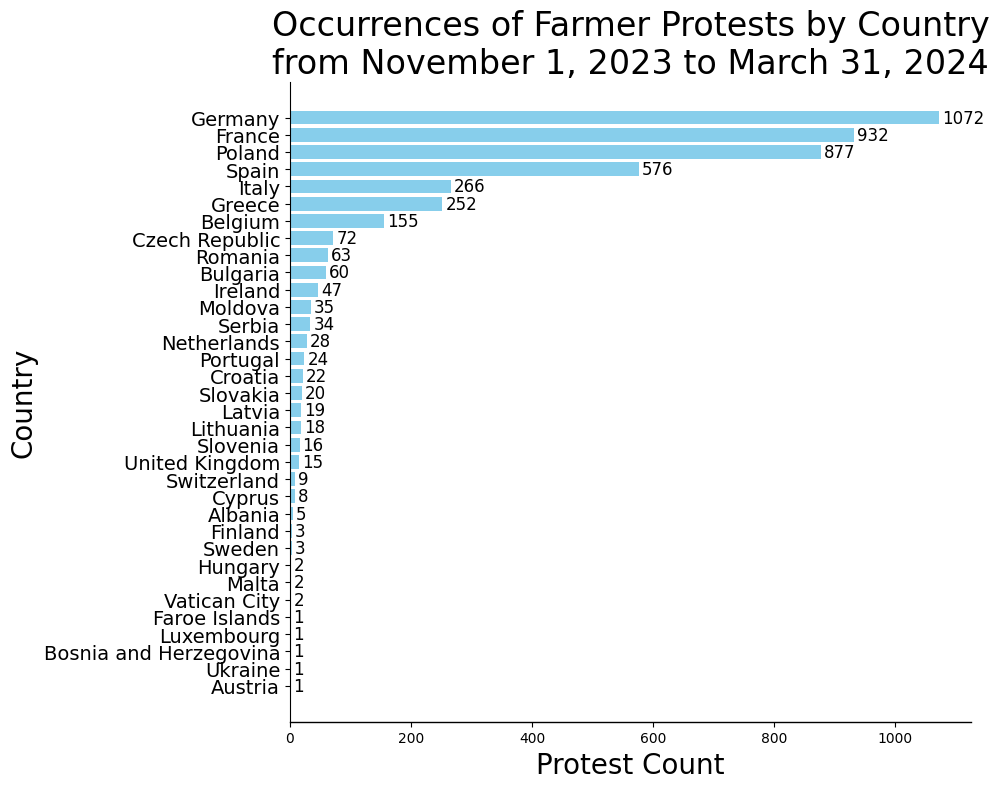

In [23]:
df_main = pd.read_csv('../data/df_main_protests.csv')
df_country_counts = df_main.groupby('country')['country'].count().reset_index(name='count')
df_country_counts.sort_values(by='count', ascending=True, inplace=True)

import pandas as pd
import matplotlib.pyplot as plt


# Create the horizontal bar graph
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
bars = plt.barh(df_country_counts['country'], df_country_counts['count'], color='skyblue')

# Add annotations (counts) to the right of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, int(width), ha='left', va='center', fontsize=12) # Adjust text position as needed

# Customize the plot
plt.ylabel("Country", fontsize=20)
plt.yticks(fontsize=14)
plt.xlabel("Protest Count", fontsize=20)
plt.title("Occurrences of Farmer Protests by Country\nfrom November 1, 2023 to March 31, 2024", fontsize=24)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Remove unnecessary spines
plt.gca().spines['top'].set_visible(False)    # Hide the top spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine
plt.gca().spines['left'].set_visible(1)   # Hide the left spine
plt.gca().spines['bottom'].set_linewidth(1)   # Set the x-axis line width
# Show the plot

# plt.savefig('../img/country_protest_count.png', dpi=600, bbox_inches='tight')

plt.show()

C:\Users\cstetter\AppData\Local\Temp\ipykernel_19080\476041207.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', 18).colors
C:\Users\cstetter\AppData\Local\Temp\ipykernel_19080\476041207.py:192: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  central_subplot.annotate(
C:\Users\cstetter\AppData\Local\Temp\ipykernel_19080\476041207.py:216: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


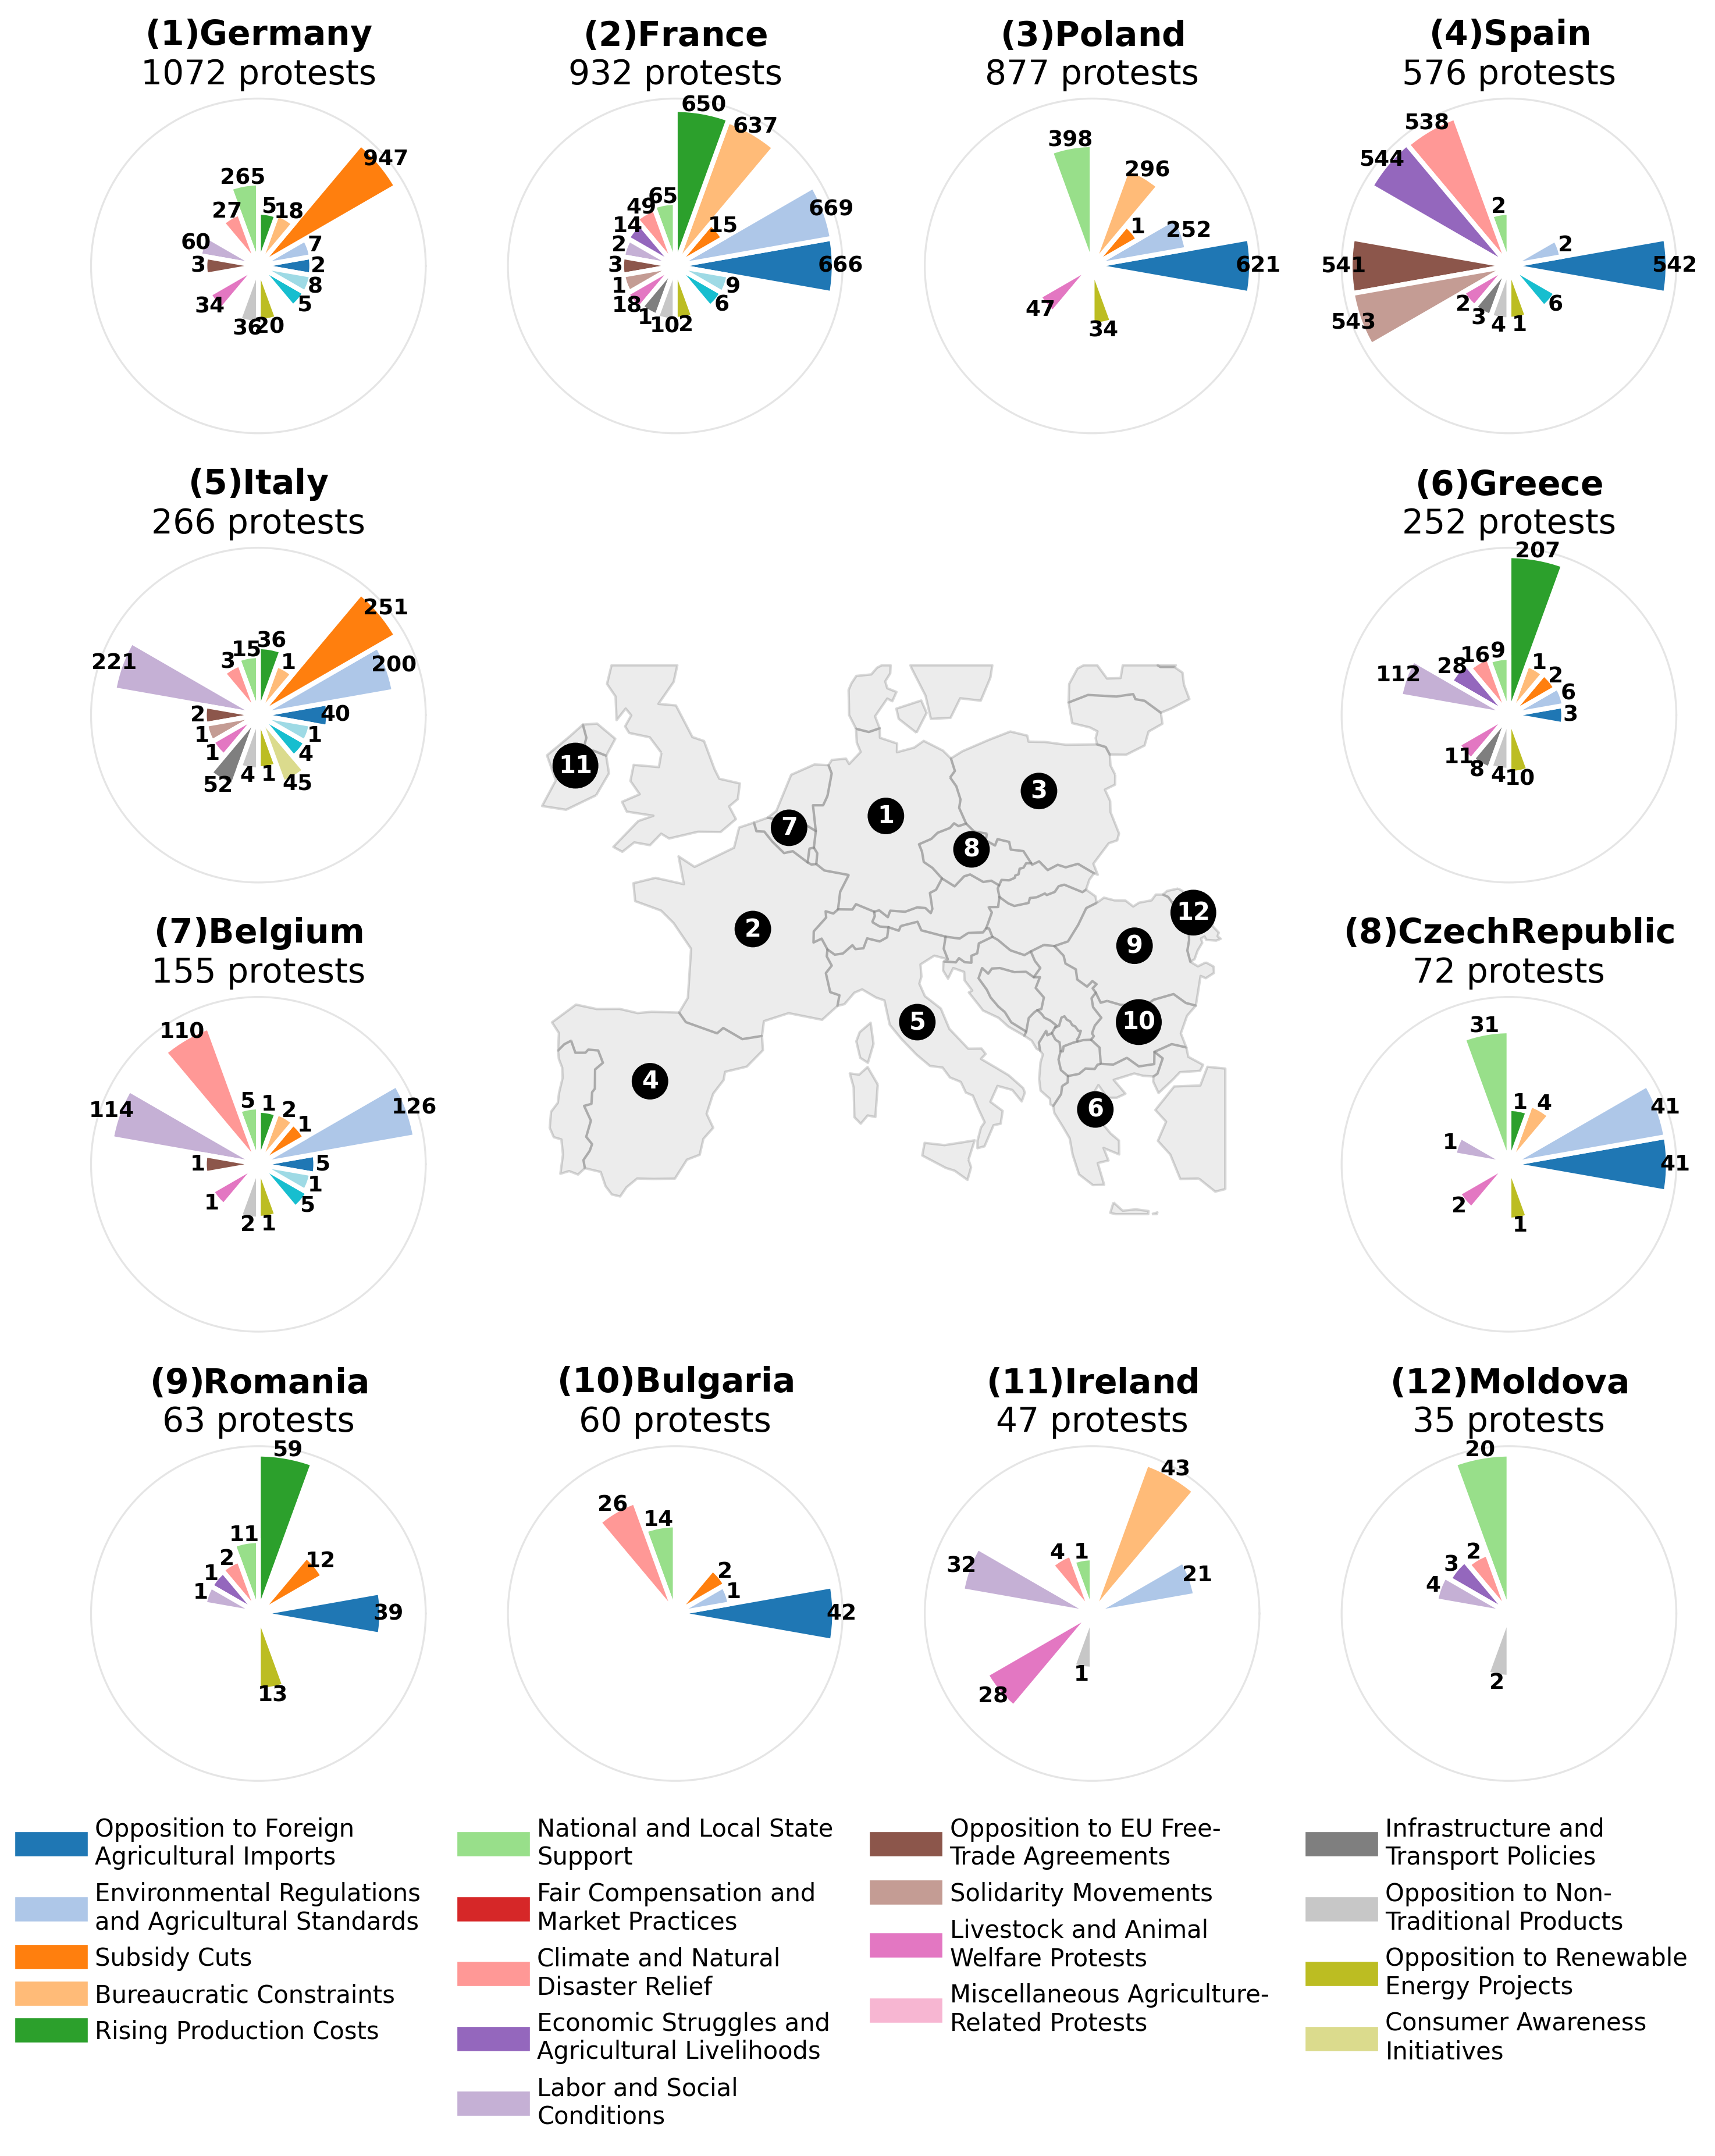

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import geopandas as gpd
import matplotlib.cm as cm

# plt.rc('text', usetex=True)


number_country_dict = {
    'Germany': 1,
    'France': 2,
    'Poland': 3,
    'Spain': 4,
    'Italy': 5,
    'Greece': 6,
    'Belgium': 7,
    'Czech Republic':8,
    'Romania': 9,
    'Bulgaria':10,
    'Ireland':11,
    'Moldova':12
   }


# Coords covering Europe & Russia made with http://bboxfinder.com
bbox = make_bbox(-11.386719,35.228890,45.292969,57.543330)

# STEP 2 #
# Convert to gdf
bbox_gdf = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry = [bbox])

# Use bbox as clipping border for Europe
europe1 = europe.overlay(bbox_gdf, how="intersection")
europe1['ADMIN'] = europe1['ADMIN'].replace({'Czechia': 'Czech Republic', 'Republic of Serbia': 'Serbia'})
europe1['COUNTRY_NUM'] = europe1['ADMIN'].map(number_country_dict).fillna(-1).astype(int)
europe1['COUNTRY_NUM'] = europe1['COUNTRY_NUM'].astype(str).replace('-1', '')


# Define colors
colors = cm.get_cmap('tab20', 18).colors

selected_columns = ["country"] + df_results_full.loc[:, sorted_cols_map].columns.tolist()
df_results_selected = df_results_full[selected_columns]
grouped_data = df_results_selected.groupby(["country"]).sum()
filtered_data = grouped_data[grouped_data.sum(axis=1) > 1].T


countries = filtered_data.columns.tolist()
categories = filtered_data.index.tolist()

# Compute global min and max values
global_min = filtered_data.min().min()
global_max = filtered_data.max().max()


# Set up figure
fig = plt.figure(constrained_layout=True, dpi=300, figsize=(12, 13))

# Create a 4x4 grid
spec = gridspec.GridSpec(ncols=4, nrows=4, figure=fig, height_ratios=[1,1,1,1])


# Defining subplots for the numbered cells
subplot_positions = {
    1: fig.add_subplot(spec[0, 0], polar=True),  # First row
    2: fig.add_subplot(spec[0, 1], polar=True),
    3: fig.add_subplot(spec[0, 2], polar=True),
    4: fig.add_subplot(spec[0, 3], polar=True),
    5: fig.add_subplot(spec[1, 0], polar=True),  # Third row
    6: fig.add_subplot(spec[1, 3], polar=True),
    7: fig.add_subplot(spec[2, 0], polar=True),  # Fourth row
    8: fig.add_subplot(spec[2, 3], polar=True),
    9: fig.add_subplot(spec[3, 0], polar=True),  # Fifth row
    10: fig.add_subplot(spec[3, 1], polar=True),
    11: fig.add_subplot(spec[3, 2], polar=True),
    12: fig.add_subplot(spec[3, 3], polar=True)
}

# Create the large subplot (for "0" cells) spanning the center
central_subplot = fig.add_subplot(spec[1:3, 1:3])  # Spans rows 1-2, cols 1-2

# Example of data plotting for individual subplots
# Assuming `europe` is a GeoDataFrame of the map of Europe
# And `gdf` is a GeoDataFrame with binary columns you want to plot

# Flatten subplots into a list for easy iteration
axs = list(subplot_positions.values())

# Sort countries based on their assigned numbers
sorted_country_tuples = sorted(number_country_dict.items(), key=lambda x: x[1])
country_sums = df_country_counts.set_index('country')['count']

# Loop through the sorted countries based on their number to create polar plots
for country, number in sorted_country_tuples:
    # If the country is in filtered data, continue
    if country in filtered_data.columns:
        data = filtered_data[country]  # Get data for the current country

        # Use the corresponding subplot for each country based on its number
        ax = subplot_positions[number]

        # Filter out zero values
        non_zero_data = data

        # Compute max and min in the non-zero dataset
        max_value = non_zero_data.max()
        min_value = non_zero_data.min()

        # Set coordinates limits
        upperLimit = 120
        lowerLimit = 40

        # Compute the heights based on the non-zero data
        slope = (upperLimit - lowerLimit) / (max_value - min_value)
        heights = np.where(data.values == 0, 0, slope * (data.values - min_value) + lowerLimit)

        # Compute the width of each bar
        width = 2 * np.pi / len(non_zero_data)

        # Compute the angle each bar is centered on
        indexes = list(range(len(non_zero_data)))
        angles = [element * width for element in indexes]

        # Plot bars
        bars = ax.bar(
            x=angles,
            height=heights,
            width=width,
            bottom=lowerLimit,
            linewidth=2,
            edgecolor="white",
            color=[colors[idx % len(colors)] for idx in indexes],
            zorder=1
        )

        # Remove labels from x-ticks
        ax.set_xticks([])
        ax.set_yticks([])

        # Add labels and percentage annotations for non-zero values
        for bar, angle, height, label, value in zip(bars, angles, heights, non_zero_data.index, non_zero_data.values):
            rotation = np.rad2deg(angle)
            alignment = "right" if np.pi / 2 <= angle < 3 * np.pi / 2 else "left"
            if alignment == "right":
                rotation += 180

            # Only add annotations if the value is not zero
            if value > 0:
                # Add percentage value annotations
                ax.text(
                    x=angle,
                    y=lowerLimit + height + 5,  # Align in the middle of the bar
                    s=f'{value:.0f}',  # Format value as percentage
                    ha='center',
                    va='center',
                    color='black',
                    fontsize=9,
                    rotation_mode="anchor",
                    weight="bold"
                )

        # Customize the plot
        ax.set_facecolor("white")
        ax.grid(None)
        ax.spines['polar'].set_color((0, 0, 0, 0.1))  # Set color with RGBA where alpha is 0.1 for transparency
        ax.set_yticklabels([])


         # (3) Add a subtitle with the sum of protests
        sum_protests = country_sums[country]
        # ax.text(0, 1, f'Sum: {sum_protests:.0f}', va="top", ha='center', fontsize=10, weight='bold')


        # Add a title with country number and name
        # ax.set_title(f"({number}) {country}", fontsize=14, weight='bold')
        ax.set_title(r"$\bf{" + f"({number}) {country}" + "}$" + "\n" + f'{sum_protests:.0f} protests', fontsize=14)

        # ax.set_title(r"\fontsize{14pt}{3em}\selectfont (" + f"{number}) {country}" +
        #           r"} \fontsize{10pt}{3em}\selectfont Sum: " + f"{sum_protests:.0f}")
        # Draw a circle around the leading number of the title
        # title_text = f"{number} {country}"
        # Calculate position for the circle


# Plot the map with all instances as a point in the central subplot
europe1.plot(ax=central_subplot, color='gray', edgecolor='black', alpha=0.15)


for idx, row in europe1.iterrows():
    central_subplot.annotate(
        text=row['COUNTRY_NUM'],
        xy=row['geometry'].centroid.coords[0],
        horizontalalignment='center',
        fontsize=10,
        color='white',
        fontweight='bold',
        bbox=dict(facecolor='black', color='black', boxstyle='circle', pad=0.2)  # Black circle background
    )


# Customize the central subplot (optional)
# central_subplot.set_title("All Instances", fontsize=16, weight='bold')
central_subplot.set_axis_off()

# Create a legend below the subplots
legend_labels = categories  # Labels for the legend
# handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]  # Create handles for the legend

handles = [plt.Line2D([0], [0], color=label_color_map[label], lw=10) for label in categories]

plt.figlegend(handles, legend_labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.04), frameon=False)

# Adjust subplot layout and show plot
plt.tight_layout()


# plt.savefig('../img/country_reasons.png', dpi=600, bbox_inches='tight')

plt.show()

